In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial import distance
from itertools import product
from adjustText import adjust_text
from matplotlib.patches import Patch
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D

In [2]:
cntry_coll_fund='../../data/nf_folder/Data/DerivedData/Derived/coll_fund/cntry_coll_fund.csv'
cntry_cnt_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_year_cnt.csv'

In [3]:
plot_path="../../data/nf_folder/Figs/fund_in_collaboration.pdf"
citation_plot_path="../../data/nf_folder/Figs/fundtype_citation.pdf"

In [4]:
cntry_pub=pd.read_csv(cntry_coll_fund)
cntry_pub['funder_distinct']=cntry_pub['funder_distinct'].apply(
    lambda x:literal_eval(x) if x!='Not-Funded' else x)
cntry_pub.head()

,id,author_distinct,funder_distinct,year,rel_citation,IntCol,fund
0,30507292,Turkey,[Turkey],2009,0.485,notcol,single
1,30574690,United States,[United States],2009,0.703,col,single
2,30574690,France,[United States],2009,0.703,col,others
3,30574691,Russia,[Russia],2009,0.312,notcol,single
4,30585095,Spain,[Spain],2009,0.137,notcol,single


In [5]:
col_ratio=cntry_pub.groupby(
    ['author_distinct','year','IntCol']).size().reset_index(name='count')
col_ratio=col_ratio.pivot_table(index=['author_distinct','year'],columns='IntCol',values='count')
col_ratio=col_ratio.div(col_ratio.sum(axis=1), axis=0).reset_index()
col_ratio.head()

IntCol,author_distinct,year,col,notcol
0,Afghanistan,2009,0.823529,0.176471
1,Afghanistan,2010,0.909091,0.090909
2,Afghanistan,2011,0.928571,0.071429
3,Afghanistan,2012,0.897436,0.102564
4,Afghanistan,2013,0.925926,0.074074


In [6]:
def strc_df(data,indcol,col,start,end):
    def filter_df(data,indcol,col,year):
        df_filter=data[data.year==year][[indcol,col]]
        colnew=col+"_"+str(year)
        df_filter=df_filter.rename(columns={col:colnew})
        return df_filter
    df_start=filter_df(data,indcol,col,start)
    df_end=filter_df(data,indcol,col,end)
    df_meta=df_start.merge(df_end,on=indcol)
    return df_meta

In [7]:
col_ratio=strc_df(col_ratio,'author_distinct','col',2009,2018)

In [8]:
#the tendency to fund in scientific collaboration
fund_ratio=cntry_pub[cntry_pub.IntCol=='col']
fund_ratio=fund_ratio.groupby(
    ['author_distinct','year','fund']).size().reset_index(name='count')
fund_ratio=fund_ratio.pivot_table(index=['author_distinct','year'],columns='fund',values='count',fill_value=0)
fund_ratio=fund_ratio.div(fund_ratio.sum(axis=1), axis=0).reset_index()
fund_ratio['involved']=fund_ratio['cofund']+fund_ratio['single']
fund_ratio=strc_df(fund_ratio,'author_distinct','involved',2009,2018)
fund_ratio

fund,author_distinct,involved_2009,involved_2018
0,Afghanistan,0.000000,0.000000
1,Albania,0.000000,0.000000
2,Algeria,0.045267,0.090708
3,Andorra,0.000000,0.250000
4,Angola,0.000000,0.083333
...,...,...,...
188,Venezuela,0.169463,0.108553
189,Vietnam,0.087017,0.204920
190,Yemen,0.013333,0.016077
191,Zambia,0.054545,0.039157


In [9]:
topn=['United States','China','Japan','South Korea','Germany','India','Canada','Spain','United Kingdom']

In [23]:
bins=np.arange(0,11)/10
labels=np.arange(0,10)/10
labels

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [11]:
meta=fund_ratio.merge(col_ratio,on='author_distinct',how='inner')
meta['x1']=pd.cut(meta['col_2009'],bins,labels=labels,include_lowest=True)
meta['y1']=pd.cut(meta['involved_2009'],bins,labels=labels,include_lowest=True)
meta.head()

,author_distinct,involved_2009,involved_2018,col_2009,col_2018,x1,y1
0,Afghanistan,0.000000,0.000000,0.823529,0.938462,0.8,0.0
1,Albania,0.000000,0.000000,0.671875,0.903553,0.6,0.0
2,Algeria,0.045267,0.090708,0.612863,0.604925,0.6,0.0
3,Andorra,0.000000,0.250000,0.500000,1.000000,0.4,0.0
4,Angola,0.000000,0.083333,0.966667,0.983607,0.9,0.0


In [12]:
cntry_pub[cntry_pub.fund=='others']

,id,author_distinct,funder_distinct,year,rel_citation,IntCol,fund
2,30574690,France,[United States],2009,0.703,col,others
5,30585097,Germany,[Spain],2009,0.410,col,others
9,30585103,United Kingdom,[Ireland],2009,0.957,col,others
12,30585105,United States,[Canada],2009,0.000,col,others
18,30593088,France,[Russia],2009,1.503,col,others
...,...,...,...,...,...,...,...
11107746,65301086,France,"[Japan, China]",2018,0.000,col,others
11107748,65301258,Brazil,[Portugal],2012,0.292,col,others
11107752,65301283,United States,"[Netherlands, EU]",2016,0.000,col,others
11107758,65301320,Ukraine,[United Kingdom],2017,0.000,col,others


In [13]:
col_ftype=cntry_pub[cntry_pub.IntCol=='col']
col_ftype=col_ftype.groupby(['author_distinct','fund']).size().reset_index(name='count')
col_ftype=col_ftype.pivot_table(index='author_distinct',columns='fund',values='count',fill_value=0)
col_ftype=col_ftype.div(col_ftype.sum(axis=1), axis=0).reset_index()
col_ftype.head()

fund,author_distinct,cofund,not-identified,others,single
0,Afghanistan,0.000000,0.530997,0.466307,0.002695
1,Albania,0.004916,0.650934,0.335300,0.008850
2,Algeria,0.035784,0.679559,0.235084,0.049573
3,Andorra,0.029412,0.485294,0.411765,0.073529
4,Angola,0.074946,0.381156,0.535332,0.008565


In [14]:
col_ftype_topn=col_ftype[col_ftype.author_distinct.isin(topn)]

In [15]:
meta_topn=meta[meta.author_distinct.isin(topn)]
meta_topn

,author_distinct,involved_2009,involved_2018,col_2009,col_2018,x1,y1
32,Canada,0.344872,0.366661,0.471687,0.614118,0.4,0.3
37,China,0.533996,0.736844,0.223630,0.265053,0.2,0.5
66,Germany,0.363975,0.448824,0.496058,0.618416,0.4,0.3
79,India,0.253496,0.314241,0.190892,0.270998,0.1,0.2
88,Japan,0.339146,0.436387,0.253929,0.349773,0.2,0.3
159,South Korea,0.452321,0.550141,0.254447,0.315588,0.2,0.4
160,Spain,0.482174,0.557339,0.434201,0.597677,0.4,0.4
182,United Kingdom,0.327779,0.405013,0.518897,0.701066,0.5,0.3
183,United States,0.418821,0.440059,0.321063,0.464636,0.3,0.4


In [16]:
flag_df=pd.read_csv("../../data/nf_folder/Data/AdditionalData/country_WoS_ECI_WB_flags.tsv",sep="\t")
flag_df.head()

,WoS,ECI_Country,WB,Code
0,Albania,Albania,Albania,ALB
1,Algeria,Algeria,Algeria,DZA
2,Angola,Angola,Angola,AGO
3,Argentina,Argentina,Argentina,ARG
4,Australia,Australia,Australia,AUS


In [17]:
col_ftype_topn=col_ftype_topn.sort_values(by='single')
col_ftype_topn=col_ftype_topn.merge(flag_df[['WoS','Code']],left_on='author_distinct',right_on='WoS')

In [21]:
meta

,author_distinct,involved_2009,involved_2018,col_2009,col_2018,x1,y1
0,Afghanistan,0.000000,0.000000,0.823529,0.938462,0.8,0.0
1,Albania,0.000000,0.000000,0.671875,0.903553,0.6,0.0
2,Algeria,0.045267,0.090708,0.612863,0.604925,0.6,0.0
3,Andorra,0.000000,0.250000,0.500000,1.000000,0.4,0.0
4,Angola,0.000000,0.083333,0.966667,0.983607,0.9,0.0
...,...,...,...,...,...,...,...
188,Venezuela,0.169463,0.108553,0.504230,0.803170,0.5,0.1
189,Vietnam,0.087017,0.204920,0.791257,0.786712,0.7,0.0
190,Yemen,0.013333,0.016077,0.742574,0.974922,0.7,0.0
191,Zambia,0.054545,0.039157,0.964912,0.948571,0.9,0.0


In [26]:
meta[(meta.x1==0.8)&(meta.y1==0)]

,author_distinct,involved_2009,involved_2018,col_2009,col_2018,x1,y1
0,Afghanistan,0.000000,0.000000,0.823529,0.938462,0.8,0.0
17,Benin,0.047619,0.032468,0.859649,0.872521,0.8,0.0
18,Bermuda,0.047619,0.172414,0.840000,0.966667,0.8,0.0
26,Burkina Faso,0.000000,0.009036,0.866337,0.929972,0.8,0.0
28,Burundi,0.000000,0.094340,0.888889,1.000000,0.8,0.0
31,Cameroon,0.022959,0.041667,0.808247,0.770538,0.8,0.0
35,Chad,0.000000,0.000000,0.888889,0.970588,0.8,0.0
50,Ecuador,0.076655,0.245890,0.856716,0.914379,0.8,0.0
61,French-Guiana,0.025641,0.012048,0.812500,0.855670,0.8,0.0
69,Grenada,0.000000,0.000000,0.880952,0.993902,0.8,0.0


<ipython-input-29-25b616a2a52e>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(labels=labels,horizontalalignment='left',fontsize=14)
<ipython-input-29-25b616a2a52e>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels=np.arange(0,11,2)/10,fontsize=14)
<ipython-input-29-25b616a2a52e>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['{:,.0%}'.format(x) for x in vals])


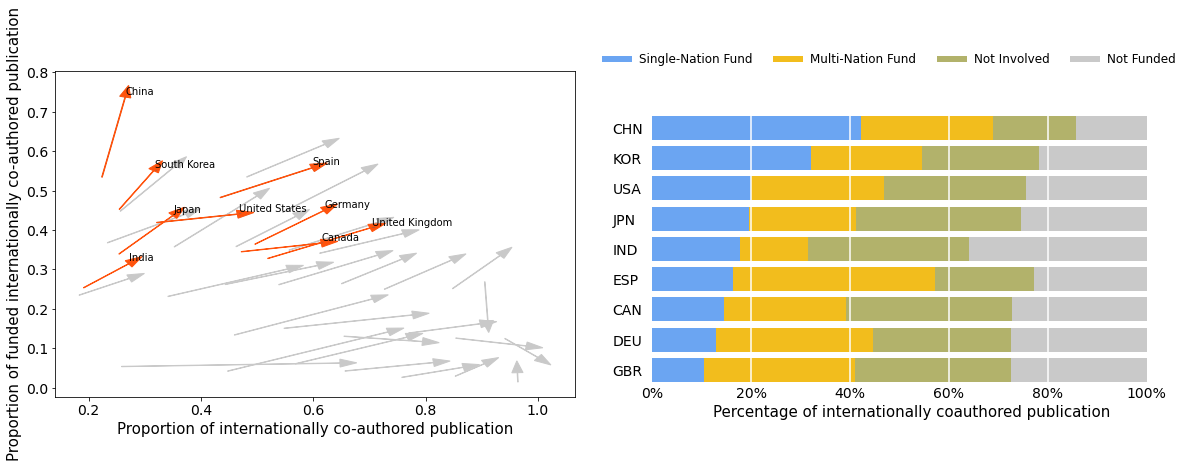

In [29]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))
plt.subplots_adjust(wspace=0.15)
for x,y in product(labels, repeat=2):
    meta_sub=meta[(meta.x1==x)&(meta.y1==y)]
    if not meta_sub.empty:
        x1=meta_sub['col_2009'].mean()
        y1=meta_sub['involved_2009'].mean()
        x2=meta_sub['col_2018'].mean()
        y2=meta_sub['involved_2018'].mean()
        ax[0].arrow(x1,y1,(x2-x1),(y2-y1),head_width=0.02,color='#C9C9C9')
meta_topn=meta[meta.author_distinct.isin(topn)]
adjusttext=[]
for index, row in meta_topn.iterrows():
    x1=row['col_2009']
    y1=row['involved_2009']
    x2=row['col_2018']
    y2=row['involved_2018']
    ax[0].arrow(x1,y1,(x2-x1),(y2-y1),head_width=0.02,color='#FF530D')
    adjusttext.append(ax[0].text(x2,y2,row['author_distinct']))
adjust_text(adjusttext,force_text=0.02,arrowprops=dict(arrowstyle="-",color='dimgray',lw=0.5),size=10,ax=ax[0])
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_xlabel("Proportion of internationally co-authored publication",fontsize=15)
ax[0].set_ylabel("Proportion of funded internationally co-authored publication",fontsize=15)
#ax[0].set_ylim(0,1)

dome=col_ftype_topn['single'].values
coll=col_ftype_topn['cofund'].values
fore=col_ftype_topn['others'].values
notfund=col_ftype_topn['not-identified'].values
labels=col_ftype_topn.Code
ax[1].barh(labels,dome,label='Domestic',color='#6BA5F2')
ax[1].barh(labels,coll, left=dome,label='Collaboration',color='#F2BD1D')
ax[1].barh(labels,fore, left=dome+coll,label='Foreign',color='#B2B26B')
ax[1].barh(labels,notfund, left=dome+coll+fore,label='Not-Funded',color='#C9C9C9')
ax[1].set_yticklabels(labels=labels,horizontalalignment='left',fontsize=14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xticklabels(labels=np.arange(0,11,2)/10,fontsize=14)
ax[1].set_xlabel("Percentage of internationally coauthored publication",fontsize=15)
vals = ax[1].get_xticks()
ax[1].set_xticklabels(['{:,.0%}'.format(x) for x in vals])
ax[1].tick_params(axis='both', which='both',length=0)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].vlines([0.2,0.4,0.6,0.8],-0.4,9.4,color='white')
ax[1].tick_params(axis='y', which='major', pad=40)
ax[1].tick_params(axis='x', which='major', pad=-10)
custom_lines = [Line2D([0], [0], color='#6BA5F2',label='Domestic',lw=6),
                Line2D([0], [0], label='Collaboration',color='#F2BD1D', lw=6),
                Line2D([0], [0], label='Foreign',color='#B2B26B', lw=6),
               Line2D([0], [0], label='Not-Funded',color='#C9C9C9', lw=6)]
ax[1].legend(custom_lines,
             ['Single-Nation Fund','Multi-Nation Fund','Not Involved','Not Funded'],
             ncol=4,
            prop={'size':12},
            loc=(-0.1,1.0),
            frameon=False)

plt.savefig(plot_path, bbox_inches='tight')